In [2]:
import wav_handler as wh
from matplotlib import pyplot as plt
from scipy import signal
import numpy as np
import dirtools as dt

In [3]:
convertfactor = 106.373 / 1000 # +/- 2.126  / 1000 volts

def to_volts(amp):
    return convertfactor * amp


def get_freq(name):
    num = ""
    for char in name:
        if char == "K":
            break
        num += char
    return float(num)

#get_freq("100.2Kohm")

/home/jupyter/309 workspace/309-Pool/notebooks/wav_handler.py:5: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate, rawData = wavfile.read(filename)


1Kohm.wav 0.0012345696
99.345Kohm.wav 0.010062987
541Kohm.wav 0.023295818
298Kohm.wav 0.018077698
3.9Kohm.wav 0.0020173118
55.476Kohm.wav 0.0071976893
14.9Kohm.wav 0.0037126015
9.8Kohm.wav 0.003050027
30Kohm.wav 0.0052821585
[  1000.  99345. 541000. 298000.   3900.  55476.  14900.   9800.  30000.]
[0.00123457 0.01006299 0.02329582 0.0180777  0.00201731 0.00719769
 0.0037126  0.00305003 0.00528216]


Text(0, 0.5, 'RMS amplitude (V)')

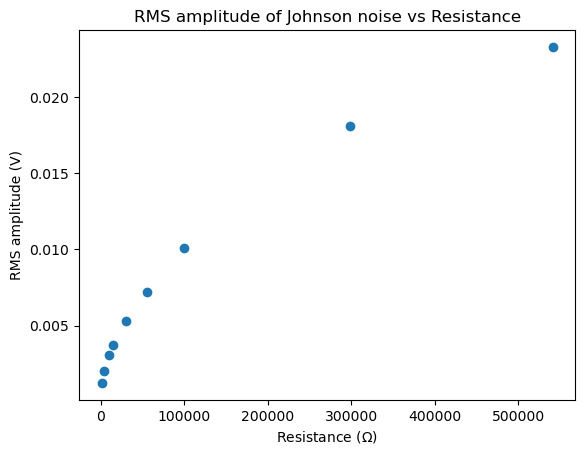

In [4]:
input_files = dt.get_files('../data_soundcard/johnson_noise/', fullpath=True)
fnames = dt.get_files('../data_soundcard/johnson_noise/')

rmses = []

for file, name in zip(input_files, fnames):
    t, d = wh.importWAV(file)
    rms = np.mean([np.sqrt(np.mean(to_volts(d["right"])**2)), np.sqrt(np.mean(to_volts(d["left"])**2))])
    print(name, rms)
    rmses.append([get_freq(name) * 1000, rms])
rmses = np.array(rmses)
print(rmses[:,0])
print(rmses[:,1])

fig, ax = plt.subplots()

ax.set_title("RMS amplitude of Johnson noise vs Resistance")
ax.scatter(rmses[:,0], rmses[:,1])
ax.set_xlabel("Resistance ($\Omega$)")
ax.set_ylabel("RMS amplitude (V)")

In [5]:
def cross_correlate(s1, s2):
    return np.mean([s1, s2], axis=0)

def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

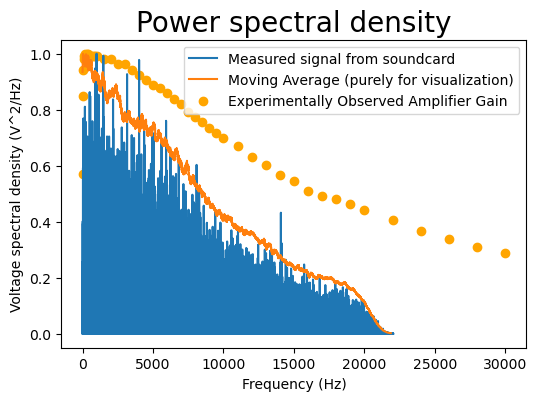

In [20]:
from scipy.signal import argrelextrema
from numpy.fft import fft, ifft

fs = 44100

t, d = wh.importWAV("../data_soundcard/johnson_noise/1Kohm.wav")

v = cross_correlate(d["left"], d["right"])

f, Pxx_den = signal.periodogram(v, fs, 'boxcar', scaling='density')

fig, ax = plt.subplots(figsize=(6,4))

window = 2000

ax.plot(f,Pxx_den / np.max(Pxx_den), label="Measured signal from soundcard")
ax.plot(f[:len(Pxx_den) - window + 1], (moving_average(Pxx_den, window) / np.max(moving_average(Pxx_den, window))), label="Moving Average (purely for visualization)")
ax.set_title('Power spectral density', fontsize=20)
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Voltage spectral density (V^2/Hz)')
data = np.loadtxt("../data_manual/freq_char-amp50.csv", delimiter=",", skiprows=1)
ax.scatter(data[:,0], data[:,4] / np.max(data[:,4]), label="Experimentally Observed Amplifier Gain", c="orange")
ax.legend()

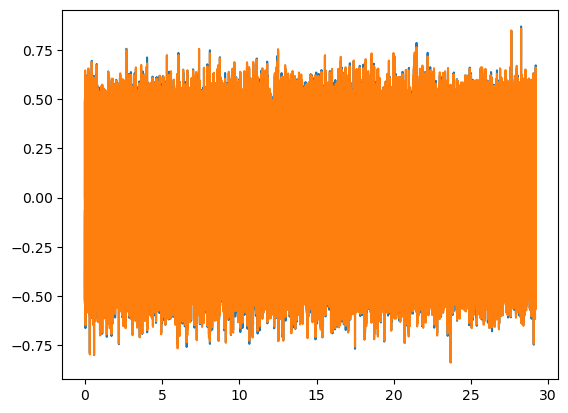

In [7]:
plt.plot(t, d["left"], t, d["right"])